In [1]:
#词频统计

In [2]:
import re # 正则表达式
import collections #词频统计
import numpy as np
import jieba
import wordcloud
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
fn = open('article1.txt',encoding='gbk')
string_data = fn.read()
fn.close()

In [4]:
#文本预处理
pattern = re.compile(u'\t|\n|\.|-|_|:|;|\(|\)|\?|"')
string_data = re.sub(pattern, '', string_data)

In [5]:
#文本分词
seg_list_exact = jieba.cut(string_data, cut_all=False)
object_list = []
remove_words = [u'的', u'，', u'和', u'是', u'随着', u'对于', ' ', u'对', u'等', u'能', u'都', u'。',
                u'、', u'中', u'与', u'在', u'其', u'了', u'可以', u'进行', u'有', u'更', u'需要', u'提供',
                u'多', u'能力', u'通过', u'会', u'不同', u'一个', u'这个', u'我们', u'将', u'并',
                u'同时', u'看', u'如果', u'但', u'到', u'非常', u'—', u'如何', u'包括', u'这']  # 自定义去除词库

In [12]:
for word in seg_list_exact:
    if word not in remove_words:
        object_list.append(word)

In [7]:
#词频统计
word_counts = collections.Counter(object_list)
word_counts_top5 = word_counts.most_common(5)
for w, c in word_counts_top5:
    print(w)
    print(c)

数据
113
分析
48
功能
47
Adobe
45
Analytics
37


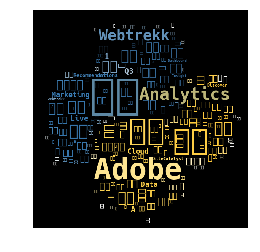

In [11]:
#词频展示
mask = np.array(Image.open('wordcloud.jpg'))
#定义词频背景
wc = wordcloud.WordCloud(font_path='Hack-Bold.ttf',mask=mask,max_words=200,max_font_size=100)
wc.generate_from_frequencies(word_counts)
image_colors = wordcloud.ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)
plt.imshow(wc)
plt.axis('off')
plt.show()